In [ ]:
# PROBLEM 1 - Load and Inspect the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

def load_data(filename):
  data = np.loadtxt(filename,delimiter=',')
  X = data[:,:2]
  y = data[:,2]
  return X, y

X_train, y_train = load_data('/content/ex2data1.txt')


print('First five elements in X_train are :\n', X_train[:5])
print('Type of X_train:',type(X_train))

print('First five elements in y_train are :\n', y_train[:5])
print('Type of y_train:',type(y_train))

print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

First five elements in X_train are :
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>
First five elements in y_train are :
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>
The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


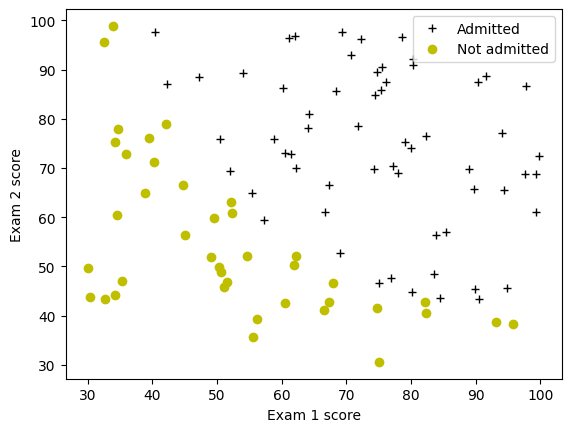

In [ ]:
# Visualize the Dataset
def plot_data(X,y,pos_label='y=1',neg_label='y=0'):
  positive = y == 1
  negative = y == 0
  plt.plot(X[positive,0],X[positive,1],'k+',label=pos_label)
  plt.plot(X[negative,0],X[negative,1],'yo',label=neg_label)
  plt.ylabel('Exam 2 score')
  plt.xlabel('Exam 1 score')
  plt.legend(loc='upper right')
plot_data(X_train,y_train[:],pos_label='Admitted',neg_label='Not admitted')

In [ ]:
# Exercise 1 - Sigmoid Function

def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

value = 0
print(f'sigmoid({value}) = {sigmoid(value)}')

sigmoid(0) = 0.5


In [ ]:
# Exercise 2 - Cost

def compute_cost(X,y,w,b,*argv):
  m,n = X.shape
  predictions = sigmoid(np.dot(X,w)+b)
  total_cost = (-1/m)*(np.sum(y*np.log(predictions)+(1-y)*np.log(1-predictions)))
  return total_cost

m,n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train,y_train,initial_w,initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [ ]:
# Exercise 3 - Gradient for Logistic Regression

def compute_gradient(X,y,w,b,*argv):
  m,n = X.shape
  dj_dw = np.zeros(w.shape)
  dj_db = 0.
  predictions = sigmoid(np.dot(X,w)+b)
  dj_dw = (1/m)*(np.dot(X.T,(predictions-y)))
  dj_db = (1/m)*(np.sum(predictions-y))

  return dj_db, dj_dw

initial_w = np.zeros(n)
initial_b = 0.
dj_db, dj_dw = compute_gradient(X_train,y_train,initial_w,initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}')

test_w = np.array([0.2, -0.5])
test_b = -24
dj_db, dj_dw = compute_gradient(X_train, y_train, test_w, test_b)
print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.009216589291153, -11.262842205513593]
dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.373841249539794]


In [ ]:
# Exercise 3 - Learning Parameters using Gradient Descent

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
  m = len(X)
  J_history = []
  w_history = []
  for i in range(num_iters):
    dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
    w_in = w_in- alpha * dj_dw
    b_in = b_in- alpha * dj_db
    if i<100000:
      cost = cost_function(X, y, w_in, b_in, lambda_)
      J_history.append(cost)
    if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
      w_history.append(w_in)
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
  return w_in, b_in, J_history, w_history

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
iterations = 10000
alpha = 0.001
w,b,J_history,w_history = gradient_descent(X_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations,0)

Iteration    0: Cost     0.96 
Iteration 1000: Cost     0.31 
Iteration 2000: Cost     0.30 
Iteration 3000: Cost     0.30 
Iteration 4000: Cost     0.30 
Iteration 5000: Cost     0.30 
Iteration 6000: Cost     0.30 
Iteration 7000: Cost     0.30 
Iteration 8000: Cost     0.30 
Iteration 9000: Cost     0.30 
Iteration 9999: Cost     0.30 


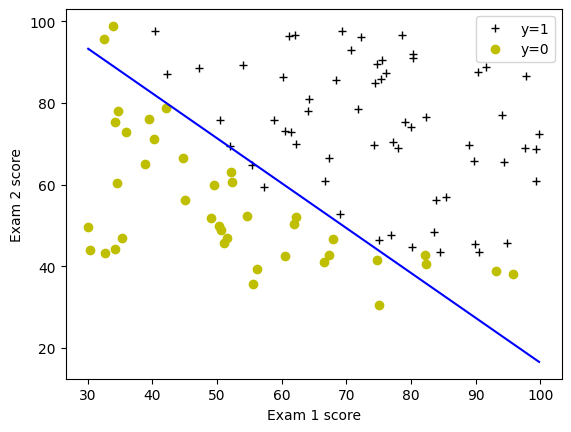

In [ ]:
# Exercise 3 - Plotting the Decision Boundary

def sig(z):
  return 1/(1+np.exp(-z))

def plot_decision_boundary(w,b,X,y):
  # Credit to dibgergeonGithubforthisplottingcode
  plot_data(X[:, 0:2], y)
  if X.shape[1] <= 2:
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x, plot_y, c='b')
  else:
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    for i in range(len(u)):
      for j in range(len(v)):
        z[i, j] = sig(np.dot(map_feature(u[i], v[j]), w).item() + b)
    z = z.T
    plt.contour(u, v, z, levels=[0.5], colors='g')

plot_decision_boundary(w,b,X_train,y_train)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Exercise 4 - Evalutating Logistic Regression

def predict(X, w, b):
  m,n = X.shape
  p = np.zeros(m)
  predictions = sigmoid(np.dot(X, w) + b)
  p = (predictions >= 0.5).astype(int)
  return p

np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4,2) - 0.5
tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

p = predict(X_train, w, b)
print('Train Accuracy: %f' % (np.mean(p == y_train) * 100))

Output of predict: shape (4,), value [0 1 1 1]
Train Accuracy: 92.000000


In [ ]:
# PROBLEM 2 - Load and Inspect the Dataset

X_train, y_train = load_data('/content/ex2data2.txt')
print('X_train:', X_train[:5])
print('Type of X_train:',type(X_train))

print('y_train:', y_train[:5])
print('Type of y_train:',type(y_train))

print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>
The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


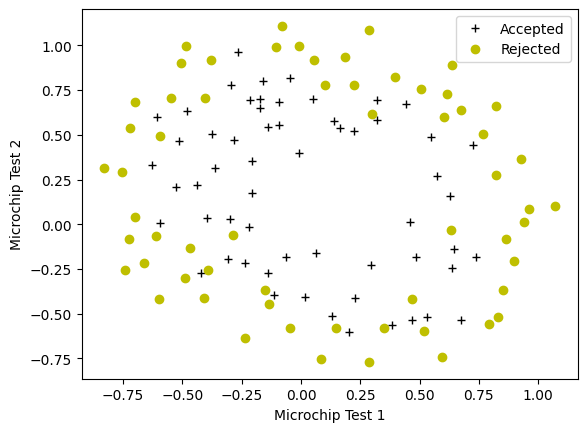

In [ ]:
# Visualize the Dataset
def plot_data(X,y,pos_label='y=1',neg_label='y=0'):
  positive = y == 1
  negative = y == 0
  plt.plot(X[positive,0],X[positive,1],'k+',label=pos_label)
  plt.plot(X[negative,0],X[negative,1],'yo',label=neg_label)
  plt.ylabel('Microchip Test 2')
  plt.xlabel('Microchip Test 1')
  plt.legend(loc='upper right')
plot_data(X_train,y_train[:],pos_label='Accepted',neg_label='Rejected')

In [ ]:
# Feature Mapping

def map_feature(X1,X2):
  X1 = np.atleast_1d(X1)
  X2 = np.atleast_1d(X2)
  degree = 6
  out = []
  for i in range(1, degree+1):
    for j in range(i + 1):
      out.append((X1**(i-j)) * (X2**j))
  return np.stack(out, axis=1)

print('Original shape of data:', X_train.shape)
mapped_X = map_feature(X_train[:, 0],X_train[:, 1])
print('Shape after feature mapping:', mapped_X.shape)

print('X_train[0]:', X_train[0])
print('mapped_X_train[0]:', mapped_X[0])

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)
X_train[0]: [0.051267 0.69956 ]
mapped_X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [ ]:
# Exercise 5 - Cost Function for Regularized Logistic Regression

def compute_cost_reg(X, y, w, b, lambda_ = 1):
  m, n = X.shape
  cost_without_reg = compute_cost(X, y, w, b)
  reg_cost = 0
  reg_cost = (lambda_/(2*m)) * np.sum(w**2)
  total_cost = cost_without_reg + reg_cost
  return total_cost

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)
print('Regularized cost :', cost)

Regularized cost : 0.6618252552483951


In [ ]:
# Exercise 6 - Gradient for Regularized Logistic Regression

def compute_gradient_reg(X, y, w, b, lambda_ = 1):
  m, n = X.shape
  dj_db, dj_dw = compute_gradient(X, y, w, b)
  return dj_db, dj_dw

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)
print(f'dj_db: {dj_db}',)
print(f'First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}')

dj_db: 0.07138288792343654
First few elements of regularized dj_dw:
 [-0.010034426775559609, 0.010476274521237073, 0.055745505756197467, 0.003977852112093803]


In [ ]:
# Exercise 6 - Learning Parameters using Gradient Descent

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 1
lambda_ = 0.01
iterations = 10000
alpha = 0.01
w,b,J_history,w_history = gradient_descent(X_mapped,y_train,initial_w,initial_b,compute_cost_reg,compute_gradient_reg,alpha,iterations,lambda_)

Iteration    0: Cost     0.72 
Iteration 1000: Cost     0.59 
Iteration 2000: Cost     0.56 
Iteration 3000: Cost     0.53 
Iteration 4000: Cost     0.51 
Iteration 5000: Cost     0.50 
Iteration 6000: Cost     0.48 
Iteration 7000: Cost     0.47 
Iteration 8000: Cost     0.46 
Iteration 9000: Cost     0.45 
Iteration 9999: Cost     0.44 


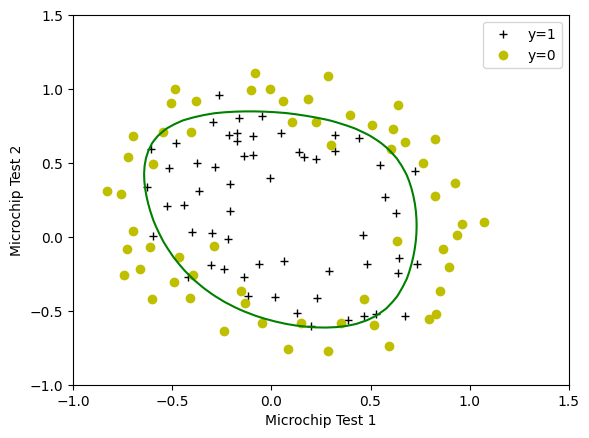

In [ ]:
# Exercise 6 - Plotting the Decision Boundary

plot_decision_boundary(w,b,X_mapped,y_train)
plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Exercise 6 - Evaluating Regularized Logistic Regression Model

p = predict(X_mapped, w, b)
print('Train Accuracy: %f' % (np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
